Objective to do this project:- Make a funnel of ideas on how to solve a data science problem

In [ ]:
# Why i it a machine learning problem at all?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
# https://www.kaggle.com/c/bank-marketing-uci/overview

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Temporary D Drive\D Drive\ML Projects\Hackathons\FactElytics\Factelytics Hackathon\Train data.csv')
# test = pd.read_csv(r'C:\Temporary D Drive\D Drive\ML Projects\Hackathons\FactElytics\Factelytics Hackathon\Test data.csv')
print('Train data')
display(df.head())
# print('Test data')
# display(test.head())

Train data


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [3]:
y = df.term_deposit_subscribed
X = df.drop('term_deposit_subscribed',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X_train['term_deposit_subscribed'] = y_train
train = X_train

C:\Users\satya\AppData\Local\Temp/ipykernel_12480/1237876045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['term_deposit_subscribed'] = y_train


In [5]:
X_test['term_deposit_subscribed'] = y_test
test = X_test

C:\Users\satya\AppData\Local\Temp/ipykernel_12480/1638145909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['term_deposit_subscribed'] = y_test


In [6]:
# Shape of train and test data
print('Shape of train data is ',train.shape)
print('Shape of test data is ',test.shape)

Shape of train data is  (22152, 18)
Shape of test data is  (9495, 18)


In [7]:
# column wise data analysis
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22152 entries, 19868 to 23654
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22152 non-null  object 
 1   customer_age                      21713 non-null  float64
 2   job_type                          22152 non-null  object 
 3   marital                           22052 non-null  object 
 4   education                         22152 non-null  object 
 5   default                           22152 non-null  object 
 6   balance                           21866 non-null  float64
 7   housing_loan                      22152 non-null  object 
 8   personal_loan                     22051 non-null  object 
 9   communication_type                22152 non-null  object 
 10  day_of_month                      22152 non-null  int64  
 11  month                             22152 non-null  object 
 12  

In [8]:
# Biggest challenge while solving any machine learning problem
# 1. How should I start the problem
# 2. How to deal missing value
# 3. hHow to deal with outliers
# 4. Variable transformations
# 5. Which model to start with and how to know that whether this model should ideally be tried or not before fitting
# 6. How can I leverage EDA to make more features and a robust ML model
# 7. Which all statistcal tests should I need to perform?
# 8. How can I evaluate the performance of the model?
# 9. How can I diagnose the model, stability, scalability?

In [9]:
# I will first start observing data at a macro level
# 1. Does there exist any discrepency in train and test data no of column, column names, their data types
# 2. Shouldn't be the case that test data is a subset of train data> If it happens then we would have been solving the wrong problem
# the beginning. Hence it is most important quality check to be done.

In [10]:
# target_variable  = set(list(train.columns)) - set(list(test.columns))
# target_variable

In [11]:
len(train.id.unique()) # all the values are unique, drop
train.drop('id',1,inplace = True) # Don't consider in the modelling

C:\Users\satya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
test.drop('id',1,inplace = True)

In [13]:
train.duplicated().sum()

0

In [14]:
test.duplicated().sum()

0

In [15]:
# There are no cases of data duplicacy.

In [16]:
# check test is a subset of train or not


In [17]:
# Now I will start observing the target variable. 

In [18]:
positive = train['term_deposit_subscribed'].value_counts()[1]
negaitive = train['term_deposit_subscribed'].value_counts()[0]
print('Minority samples (positive) are', positive)
print('Majority samples (positive) are', negaitive)
print('Class Imabalance ratio is ', 100 - 100*round(positive/train.shape[0],2),':',100*round(positive/train.shape[0],2))

Minority samples (positive) are 2410
Majority samples (positive) are 19742
Class Imabalance ratio is  89.0 : 11.0


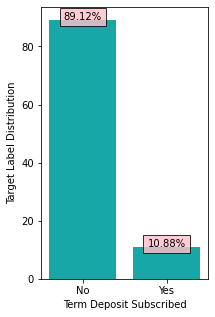

In [19]:
# plot
label_count = {}
def addtext(label_count):
    key_list = list(label_count)
    for i in range(len(key_list)):
        plt.text(i,label_count[key_list[i]], str(round(label_count[key_list[i]],2)) + '%', ha = 'center', 
                 bbox = dict(facecolor = 'pink', alpha = 0.8))

label_count["Yes"] = 100*(train[train["term_deposit_subscribed"] == 1]).shape[0]/train.shape[0]
label_count['No'] = round(100 - label_count['Yes'],2)

label_count = dict(sorted(label_count.items(), key=lambda item: item[1], reverse = True))

f, ax = plt.subplots(figsize=(3, 5))
sns.barplot(x= list(label_count.keys()) , y = list(label_count.values()), color="c")

addtext(label_count)

plt.xlabel('Term Deposit Subscribed')
plt.ylabel("Target Label Distribution")
plt.show()

In [20]:
# Do both the classes mutually exclusive or there exist some kind of overlapping in them. 
# It is very importnat quality check we have to about the target variable


In [21]:
# Now checking the data at micro level - leveraging basic statistical methods
# 1. Is there any duplicacy in train dataset
# 2. How many fields are missing?
# 3. Are they missing at random, missing completely at random or not missing at random?
# 4. How many numeric and categorical variables are there?
# 5. Chekicng the importance of each feature with respect to our problem statement > this is done prior to machine learning modelling

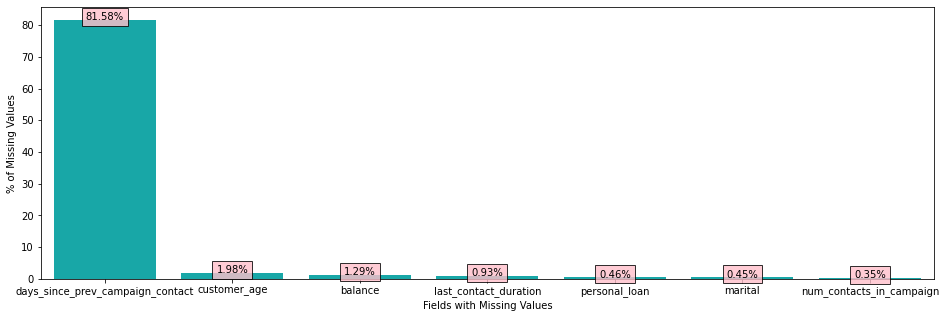

In [22]:
#How many fields are missing? make plot of it, make it more story teller. 
col_missing_count = {}
def addtext(col_missing_count):
    key_list = list(col_missing_count)
    for i in range(len(key_list)):
        plt.text(i,col_missing_count[key_list[i]], str(round(col_missing_count[key_list[i]],2)) + '%', ha = 'center', 
                 bbox = dict(facecolor = 'pink', alpha = 0.8))

for column in list(train.columns):
    if train[column].isna().sum() != 0: # Case of missing value
        col_missing_count[column] = 100*train[column].isna().sum()/train.shape[0]

        col_missing_count = dict(sorted(col_missing_count.items(), key=lambda item: item[1], reverse = True))

f, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x= list(col_missing_count.keys()) , y = list(col_missing_count.values()), color="c")

addtext(col_missing_count)

plt.xlabel("Fields with Missing Values")
plt.ylabel("% of Missing Values")
plt.show()

In [23]:
# During missing value imputation, we will try to analyse
# Are they missing at random, missing completely at random or not missing at random?

In [24]:
train = train.drop('days_since_prev_campaign_contact',1)

In [25]:
test = test.drop('days_since_prev_campaign_contact',1)

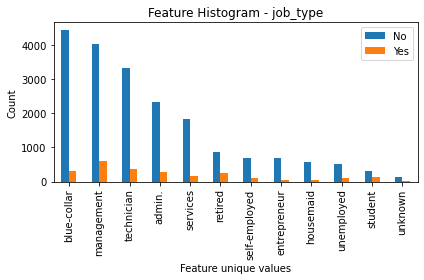

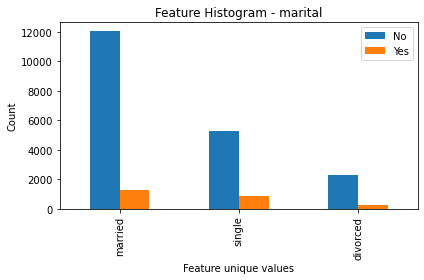

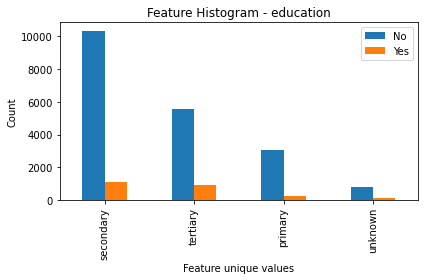

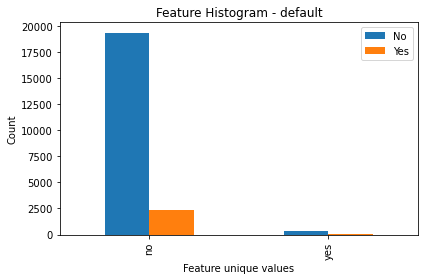

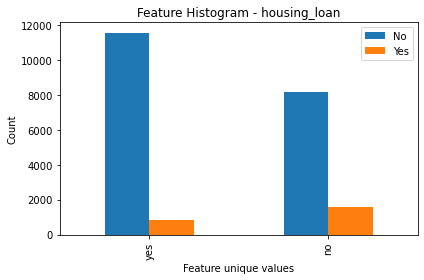

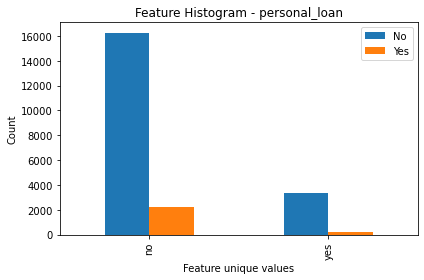

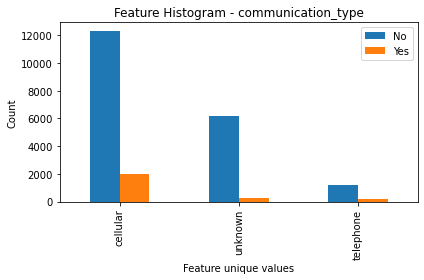

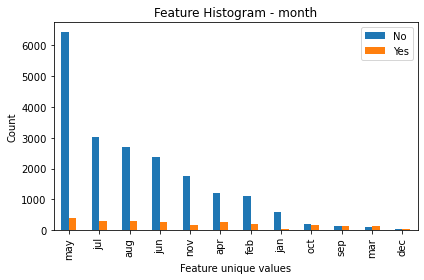

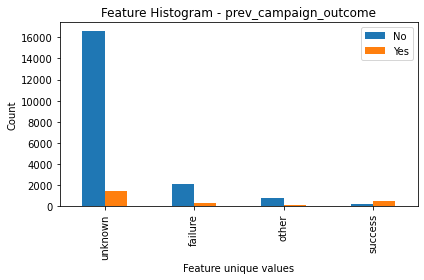

In [26]:
raw_df = train.copy()
raw_df_grouped = raw_df.groupby("term_deposit_subscribed")
class_name_no = 0
class_name_yes = 1
raw_df_grouped_no = raw_df_grouped.get_group(class_name_no)
raw_df_grouped_yes = raw_df_grouped.get_group(class_name_yes)

def plot_histogram_categorical(feature_name):
    feature_df = pd.DataFrame()
    feature_df["No"] = raw_df_grouped_no[feature_name].value_counts()
    feature_df["Yes"] = raw_df_grouped_yes[feature_name].value_counts()

    feature_df.plot(kind='bar')
    plt.title("Feature Histogram - "+feature_name)
    plt.ylabel("Count")
    plt.xlabel("Feature unique values")
    plt.tight_layout()

def plots(df):
    for col_name in list(df.columns):
        if df[col_name].dtype == 'O':
            plot_histogram_categorical(col_name)    
plots(train)  

In [27]:
# Impute marital with married and personal loan with no
train.marital.fillna('married',inplace = True)
train.personal_loan.fillna('no',inplace = True)

test.marital.fillna('married',inplace = True)
test.personal_loan.fillna('no',inplace = True)

In [28]:
# For numeric variables following analysis are required
# 1. What is the univariate distribution of the field? Central tendency, skewness, kurtosis, deviation
# 2. bivariate distribution with respect to target field?
# 3. Any outlliers? IF yes, what are the possible reasons for this? Business insights
# 4. Any missing value? If yes, what are the possible reasons for this? Business insights
# 5. Linear correlation with other numeric variables?
# 6. Any variable transformation technique which could make this field more significant or intuitive
# 7. Can this variable be converted to categorical without any information loss?
# 8. Can some addition/external dataset be used to improve information provided by this field?
# 9. Can this field be merged/processed with some other variable?
# 10. Is this variable satisfying the assumption of logistic regression?

In [29]:
# For categorical variables following analysis is required
# 1. Univariate distribution
# 2. Bivariate Distribution
# 3. Imbalancing?
# 4. Encoding methods: One hot encoding, label encoding, WoE, IV, Laplace transformation
# 5. Any missing value? If yes, what are the possible reasons for this? Business insights
# 6. Multivariate distribution
# 7. Can some addition/external dataset be used to improve information provided by this field?
# 8. Can this field be merged/processed with some other variable?
# 9. Is this variable satisfying the assumption of logistic regression?

In [30]:
# Univariate Analysis

#### Customer_age 
1. Distribution of customer_age is a slightly positively skewed but still very similar to normal distribution. 
2. There are 619 missing values in the customer_age columns which will be imputed after treating the outliers
3. Range of customer_age column is 18-97. For target class 1 and 0, outliers are behaving similarly as we can see in the box plot, so we have treated them together using the Inter-Quartile-Range and capped all all the values more than 72.
4. Since the dataset in imabalanced, we have used the median of age for term_deposit_subscribed = 1 to impute missing age with term_deposit = 1 and same is for term_deposit_subscribed = 0. 

Since dataset is imbalanced and we didn't to dominate the major class samples while imputing the missing values. We adopted this approach. 

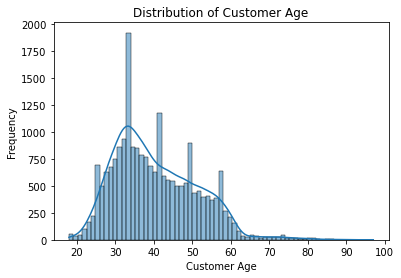

In [31]:
# Customer Age
# Plot histogram of customer_age
ax = sns.histplot(data=train, x="customer_age", kde=True)
ax.set(ylabel='Frequency', xlabel='Customer Age')
plt.title("Distribution of Customer Age")
plt.show()
# histogram is right-skewed, but also similar to normal distribution
# A few customers for the bank are more than 60 years of age. 

In [32]:
# Quartiles
Q1=train.customer_age.quantile(q=0.25)
Q3=train.customer_age.quantile(q=0.75)
print('1st Quartile (Q1) of Customer Age is ', Q1)
print('3rd Quartile (Q3) of Customer Age is ', Q3)

1st Quartile (Q1) of Customer Age is  32.0
3rd Quartile (Q3) of Customer Age is  48.0


In [33]:
# Outlier Detection from IQR
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ages ', L_outliers)
print('Upper outliers in Ages ', U_outliers)

Lower outliers in Ages  8.0
Upper outliers in Ages  72.0


In [34]:
print('Number of outliers in customer_age upper : ', train[train['customer_age']>72]['customer_age'].count())
print('Number of outliers in customer_age lower : ', train[train['customer_age']<18]['customer_age'].count())
print('% of Outlier in customer_age upper: ',round(train[train['customer_age']>72]['customer_age'].count()*100/len(train)), '%')
print('% of Outlier in customer_age lower: ',round(train[train['customer_age']<18]['customer_age'].count()*100/len(train)), '%')

Number of outliers in customer_age upper :  158
Number of outliers in customer_age lower :  0
% of Outlier in customer_age upper:  1 %
% of Outlier in customer_age lower:  0 %


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


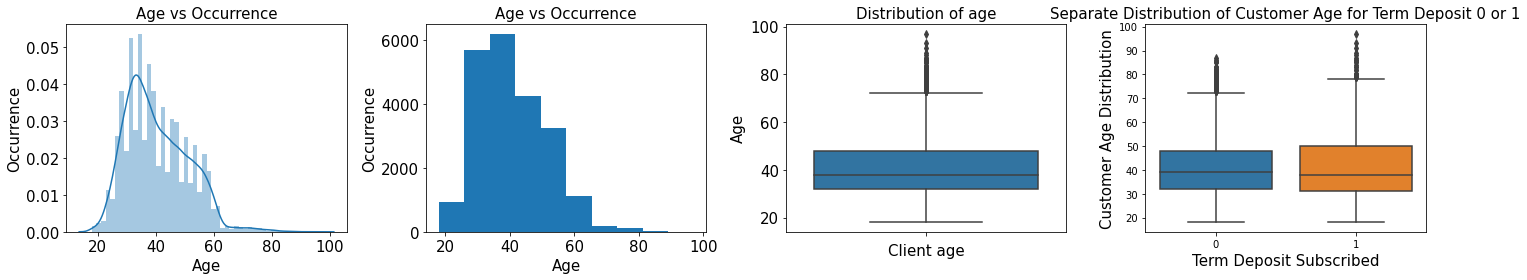

In [35]:
# Customer Age Distribution before outlier treatment and before missing value imputation
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#distplot
sns.distplot(train['customer_age'],ax=ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Age vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(train['customer_age'])
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='customer_age',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client age',fontsize=15)
ax3.set_ylabel('Age',fontsize=15)
ax3.set_title('Distribution of age',fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="customer_age", data=train, ax = ax4)
ax4.set_ylabel('Customer Age Distribution',fontsize=15)
ax4.set_xlabel('Term Deposit Subscribed',fontsize=15)
ax4.set_title("Separate Distribution of Customer Age for Term Deposit 0 or 1",fontsize=15)

plt.subplots_adjust(wspace=1)
plt.tight_layout() 
plt.savefig('Customer Age Distribution before outlier treatment and before missing value imputation.png')

In [36]:
# Issues in customer_age variable
1. Missing values
2. Outliers
3. Imbalanced Target Variable

SyntaxError: invalid syntax (Temp/ipykernel_12480/1697653694.py, line 2)

In [ ]:
# outlier treatment techniques
1. Mark then missing value
2. Capping and flooring
3. Drop them
4. Custom statistic method

In [37]:
# Mising value imputation technique
1. Run a model to impute missing value
2. Fill by mean/median/mode/constant
3. Take help of most correlation variable
4. try some self devised method

SyntaxError: invalid syntax (Temp/ipykernel_12480/587540780.py, line 2)

In [38]:
# Build a logistic regression model

In [39]:
# Treatment 1: of customer_age column
# Consider outlier values as missing values 
# Fill by median of customer age distribution


In [40]:
# Treatment 2: of customer_age column
# Consider outlier values as missing values 
# Impute missing values using other most correlated feature
# Not applicable

In [41]:
# Treatment 3: of customer_age column
# Consider outlier values as missing values 
# Impute missing values using KNN Imputation


In [42]:
# Treatment 4: of customer_age column
# Consider outlier values as missing values 
# Fill by median of customer age using linear regression based on other variables. 
# Not applicable

In [43]:
# Treatment 5: of customer_age column
# Consult with sales and marketing team about this behaviour of outlier and take help of domain experts. Try to add more data. 
# Use some other features collected in your organisation to impute these values. 


In [44]:
# Treatment 6: of customer_age column
# Floor and cap the lower and upper quantile outliers 
# Fill by median of customer age distribution


In [45]:
# Treatment 7: of customer_age column
# Floor and cap the lower and upper quantile outliers 
# Impute missing values using other most correlated feature
# Not applicable

In [46]:
# Treatment 8: of customer_age column
# Floor and cap the lower and upper quantile outliers 
# Impute missing values using KNN Imputation


In [47]:
# Treatment 9: of customer_age column
# Floor and cap the lower and upper quantile outliers  
# Fill using linear regression based on other variables. 
# Not applicable

<AxesSubplot:>

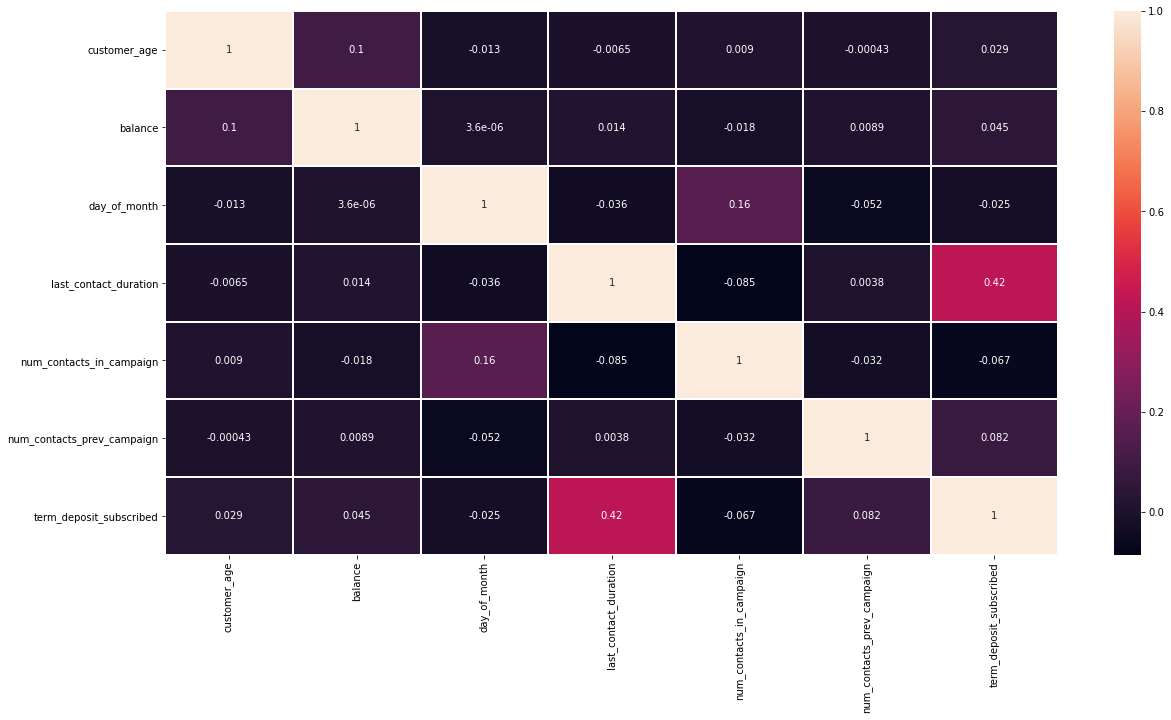

In [48]:
plt.figure(figsize = (20,10))  

sns.heatmap(train.corr(),annot = True,linewidths=1,linecolor='w')

In [49]:
train.customer_age.isna().sum()

439

In [50]:
train.loc[train.customer_age > 72,['customer_age']] = None
train.customer_age.isna().sum()

597

C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


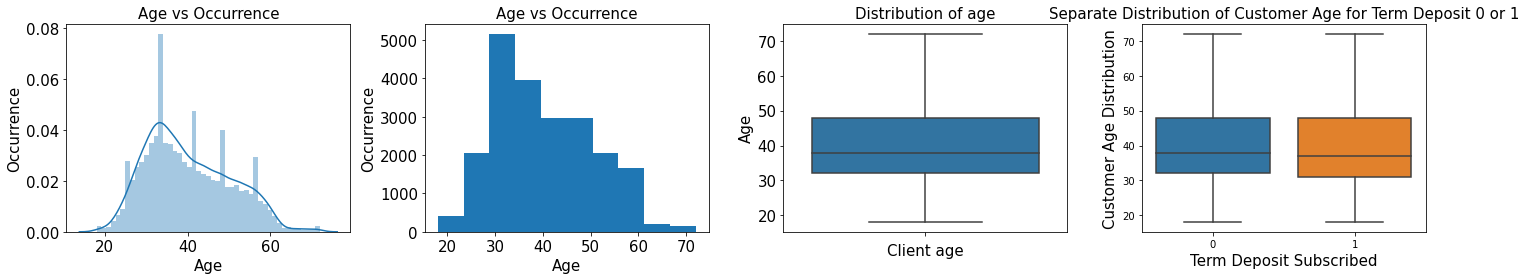

In [51]:
# Customer Age Distribution before outlier treatment and before missing value imputation
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#distplot
sns.distplot(train['customer_age'],ax=ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Age vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(train['customer_age'])
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='customer_age',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client age',fontsize=15)
ax3.set_ylabel('Age',fontsize=15)
ax3.set_title('Distribution of age',fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="customer_age", data=train, ax = ax4)
ax4.set_ylabel('Customer Age Distribution',fontsize=15)
ax4.set_xlabel('Term Deposit Subscribed',fontsize=15)
ax4.set_title("Separate Distribution of Customer Age for Term Deposit 0 or 1",fontsize=15)

plt.subplots_adjust(wspace=1)
plt.tight_layout() 

In [52]:
train.reset_index(drop = True, inplace = True)
train

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,41.0,services,married,primary,no,1080.0,yes,no,unknown,30,may,868.0,2.0,0,unknown,1
1,29.0,technician,divorced,secondary,no,3024.0,yes,no,cellular,28,aug,70.0,5.0,0,unknown,0
2,28.0,blue-collar,married,primary,no,1102.0,yes,yes,cellular,19,nov,796.0,2.0,1,failure,0
3,56.0,technician,married,secondary,no,4.0,yes,no,telephone,12,may,3.0,6.0,0,unknown,0
4,37.0,technician,married,secondary,no,629.0,no,no,cellular,8,aug,245.0,6.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22147,35.0,management,married,tertiary,no,6462.0,yes,no,cellular,21,nov,24.0,1.0,0,unknown,0
22148,48.0,technician,married,secondary,no,3901.0,yes,yes,telephone,18,nov,79.0,6.0,0,unknown,0
22149,38.0,blue-collar,married,secondary,no,1846.0,yes,no,cellular,11,may,224.0,1.0,0,unknown,0
22150,33.0,unknown,married,secondary,no,1368.0,no,no,unknown,18,jun,222.0,5.0,0,unknown,0


In [53]:
test.reset_index(drop = True, inplace = True)
test

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,27.0,services,married,secondary,no,310.0,yes,no,cellular,15,may,63.0,1.0,1,failure,0
1,58.0,self-employed,married,tertiary,no,4162.0,no,no,cellular,10,nov,179.0,1.0,0,unknown,0
2,40.0,blue-collar,divorced,secondary,no,502.0,yes,no,cellular,11,may,187.0,2.0,0,unknown,0
3,44.0,technician,married,unknown,no,1561.0,no,no,cellular,30,apr,362.0,1.0,0,unknown,1
4,55.0,services,married,secondary,no,364.0,yes,yes,cellular,29,jan,170.0,1.0,2,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,45.0,blue-collar,married,secondary,no,112.0,yes,no,unknown,8,may,371.0,2.0,0,unknown,0
9491,46.0,housemaid,married,secondary,no,4.0,no,no,cellular,11,jul,200.0,2.0,0,unknown,0
9492,41.0,management,married,tertiary,no,4058.0,yes,no,cellular,12,may,8.0,5.0,2,failure,0
9493,31.0,management,married,tertiary,no,1294.0,yes,no,cellular,15,may,246.0,1.0,0,unknown,0


In [54]:
# Impute with median
val0 = train[train.term_deposit_subscribed == 0].customer_age.median()
val1 = train[train.term_deposit_subscribed == 1].customer_age.median()
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and pd.isna(train.customer_age[i]) == True:
        train.customer_age[i] = val0
    elif train.term_deposit_subscribed[i] == 1 and pd.isna(train.customer_age[i]) == True:
        train.customer_age[i] = val1

C:\Users\satya\AppData\Local\Temp/ipykernel_12480/2783874176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.customer_age[i] = val0
C:\Users\satya\AppData\Local\Temp/ipykernel_12480/2783874176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.customer_age[i] = val1


### Balance Column

C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


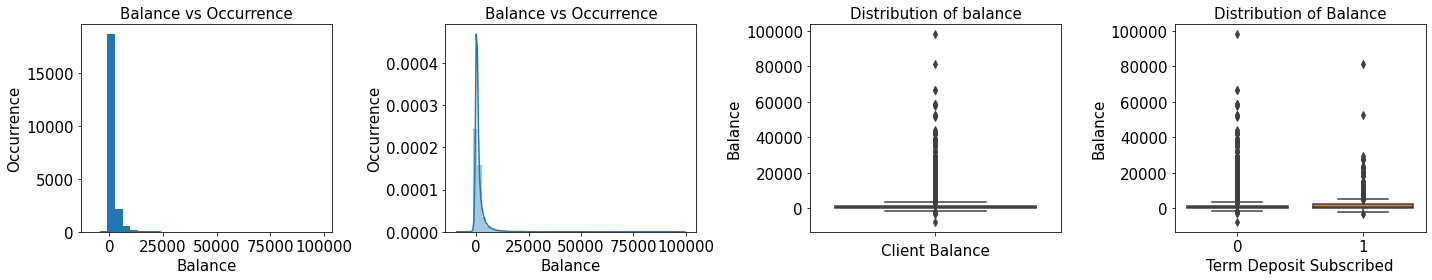

In [55]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['balance'], bins=30)
ax1.set_xlabel('Balance', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Balance vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='balance',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Balance', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of balance', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="balance", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Balance', fontsize=15)
ax4.set_title('Distribution of Balance', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [56]:
# Quartiles
Q1=train.balance.quantile(q=0.25)
Q3=train.balance.quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  74.0
3st Quartile (Q3) is:  1415.0


In [57]:
# Outlier Detection from IQR
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ages: ', L_outliers)
print('Upper outliers in Ages: ', U_outliers)

Lower outliers in Ages:  -1937.5
Upper outliers in Ages:  3426.5


In [58]:
print('Number of outliers in balance upper : ', train[train['balance']>3424.5]['balance'].count())
print('Number of outliers in balance lower : ', train[train['balance']<-1939.5]['balance'].count())
print('% of Outlier in balance upper: ',round(train[train['balance']>3424.5]['balance'].count()*100/len(train),2), '%')
print('% of Outlier in balance lower: ',round(train[train['balance']<-1939.5]['balance'].count()*100/len(train),2), '%')

Number of outliers in balance upper :  2290
Number of outliers in balance lower :  7
% of Outlier in balance upper:  10.34 %
% of Outlier in balance lower:  0.03 %


In [59]:
# train.balance.isna().sum()
train.loc[train.balance == 3424.5,['balance']] = None
train.loc[train.balance == -1939.5,['balance']] = None
train.balance.isna().sum()

286

C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


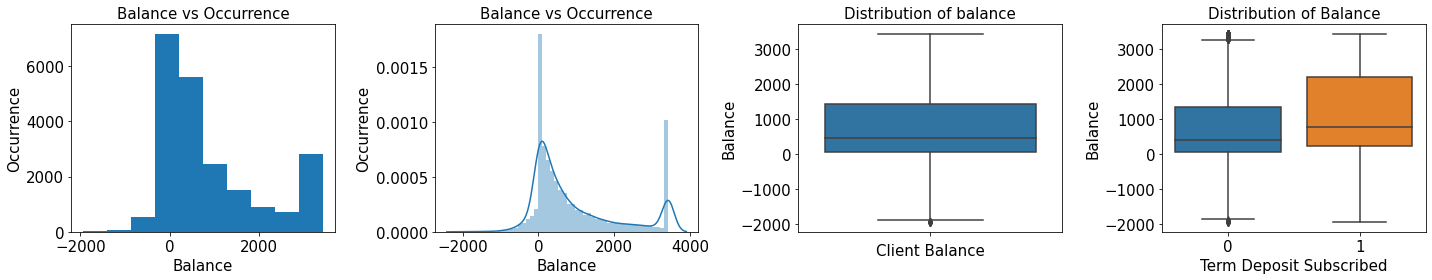

In [60]:
train.loc[train.balance > 3424.5,['balance']] = 3424.5
train.loc[train.balance < -1939.5,['balance']] = -1939.5
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['balance'])
ax1.set_xlabel('Balance', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Balance vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='balance',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Balance', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of balance', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="balance", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Balance', fontsize=15)
ax4.set_title('Distribution of Balance', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [61]:
bal0 = train[train.term_deposit_subscribed == 0].balance.median()
bal1 = train[train.term_deposit_subscribed == 1].balance.median()
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and pd.isna(train.balance[i]) == True:
        train.balance[i] = bal0
    elif train.term_deposit_subscribed[i] == 1 and pd.isna(train.balance[i]) == True:
        train.balance[i] = bal1

C:\Users\satya\AppData\Local\Temp/ipykernel_12480/1606441589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.balance[i] = bal0
C:\Users\satya\AppData\Local\Temp/ipykernel_12480/1606441589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.balance[i] = bal1


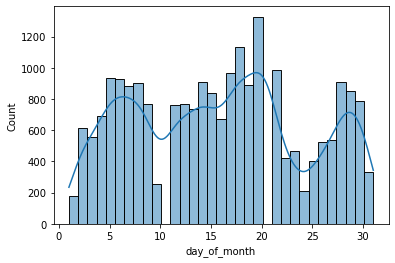

In [62]:
sns.histplot(data=train, x="day_of_month", kde=True)
plt.show() # Seems very random, we can drop this. 

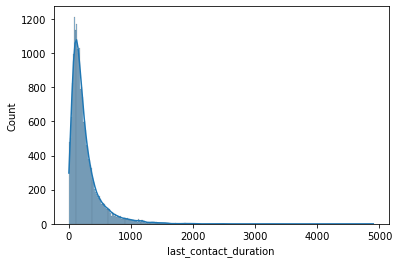

In [63]:
# Last contact duration
# Plot histogram of customer_age
sns.histplot(data=train, x="last_contact_duration", kde=True)
plt.show()

C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


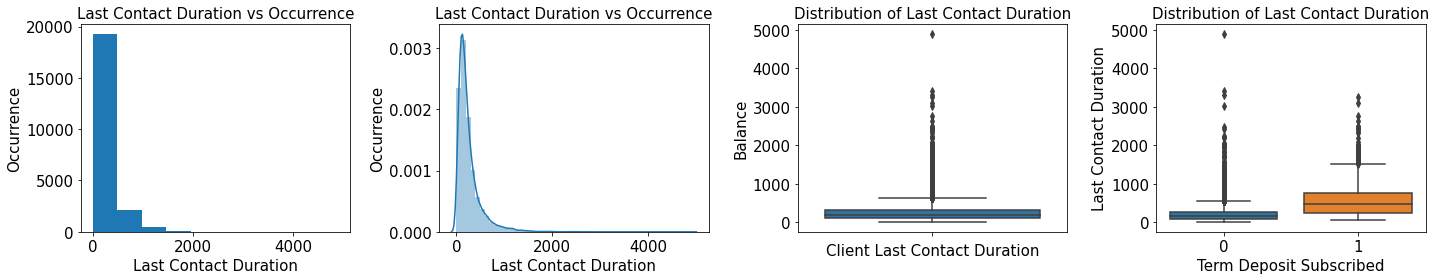

In [64]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['last_contact_duration'])
ax1.set_xlabel('Last Contact Duration', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['last_contact_duration'],ax=ax2)
ax2.set_xlabel('Last Contact Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='last_contact_duration',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Last Contact Duration', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of Last Contact Duration', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="last_contact_duration", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Last Contact Duration', fontsize=15)
ax4.set_title('Distribution of Last Contact Duration', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('Last Call before outlier and missing.png')

In [65]:
Q1=train['last_contact_duration'].quantile(q=0.25)
Q3=train['last_contact_duration'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  103.0
3st Quartile (Q3) is:  316.0


In [66]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Lower outliers in Duration:  -216.5
Upper outliers in Duration:  635.5


In [67]:
print('Number of outliers in last_contact_duration upper : ', train[train['last_contact_duration']>633.625]['last_contact_duration'].count())
print('Number of outliers in Balance lower : ', train[train['last_contact_duration']<-215.375]['last_contact_duration'].count())
print('% of Outlier in last_contact_duration upper: ',round(train[train['last_contact_duration']>633.625]['last_contact_duration'].count()*100/len(train),2), '%')
print('% of Outlier in last_contact_duration lower: ',round(train[train['last_contact_duration']<-215.375]['last_contact_duration'].count()*100/len(train),2), '%')

Number of outliers in last_contact_duration upper :  1617
Number of outliers in Balance lower :  0
% of Outlier in last_contact_duration upper:  7.3 %
% of Outlier in last_contact_duration lower:  0.0 %


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


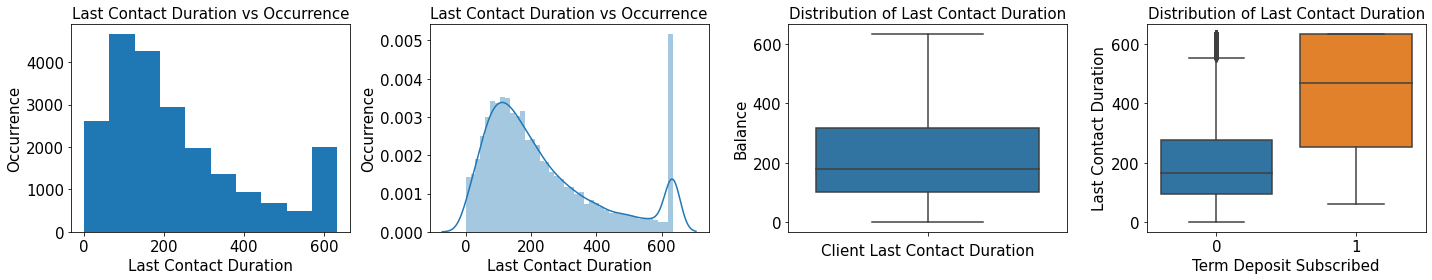

In [68]:
train.loc[train.last_contact_duration > 633.625,['last_contact_duration']] = 633.625
train.loc[train.last_contact_duration < -215.375,['last_contact_duration']] = -215.375
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['last_contact_duration'])
ax1.set_xlabel('Last Contact Duration', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['last_contact_duration'],ax=ax2)
ax2.set_xlabel('Last Contact Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='last_contact_duration',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Last Contact Duration', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of Last Contact Duration', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="last_contact_duration", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Last Contact Duration', fontsize=15)
ax4.set_title('Distribution of Last Contact Duration', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [69]:
last0 = train[train.term_deposit_subscribed == 0].last_contact_duration.median()
last1 = train[train.term_deposit_subscribed == 1].last_contact_duration.median()
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and pd.isna(train.last_contact_duration[i]) == True:
        train.last_contact_duration[i] = last0
    elif train.term_deposit_subscribed[i] == 1 and pd.isna(train.last_contact_duration[i]) == True:
        train.last_contact_duration[i] = last1

C:\Users\satya\AppData\Local\Temp/ipykernel_12480/380596000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.last_contact_duration[i] = last0
C:\Users\satya\AppData\Local\Temp/ipykernel_12480/380596000.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.last_contact_duration[i] = last1


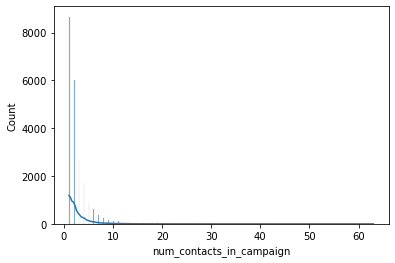

In [70]:
# Plot histogram of customer_age
sns.histplot(data=train, x="num_contacts_in_campaign", kde=True)
plt.show()

In [71]:
train.num_contacts_in_campaign.value_counts().to_dict()

{1.0: 8660,
 2.0: 6038,
 3.0: 2660,
 4.0: 1717,
 5.0: 879,
 6.0: 620,
 7.0: 366,
 8.0: 238,
 9.0: 162,
 10.0: 126,
 11.0: 102,
 12.0: 85,
 13.0: 80,
 17.0: 39,
 14.0: 39,
 15.0: 37,
 16.0: 36,
 20.0: 22,
 19.0: 22,
 18.0: 20,
 21.0: 14,
 25.0: 12,
 24.0: 11,
 29.0: 11,
 23.0: 10,
 22.0: 8,
 26.0: 7,
 28.0: 7,
 32.0: 6,
 27.0: 5,
 31.0: 5,
 30.0: 5,
 33.0: 4,
 38.0: 3,
 34.0: 3,
 43.0: 3,
 35.0: 3,
 36.0: 2,
 41.0: 2,
 63.0: 1,
 37.0: 1,
 44.0: 1,
 51.0: 1,
 55.0: 1,
 58.0: 1}

In [72]:
train[train.term_deposit_subscribed == 1].num_contacts_in_campaign.value_counts().to_dict()

{1.0: 1161,
 2.0: 629,
 3.0: 284,
 4.0: 139,
 5.0: 73,
 6.0: 40,
 7.0: 24,
 8.0: 13,
 9.0: 12,
 11.0: 6,
 17.0: 4,
 10.0: 3,
 15.0: 3,
 13.0: 3,
 16.0: 2,
 12.0: 1,
 21.0: 1,
 24.0: 1,
 14.0: 1,
 20.0: 1}

In [73]:
train[train.term_deposit_subscribed == 0].num_contacts_in_campaign.value_counts().to_dict()

{1.0: 7499,
 2.0: 5409,
 3.0: 2376,
 4.0: 1578,
 5.0: 806,
 6.0: 580,
 7.0: 342,
 8.0: 225,
 9.0: 150,
 10.0: 123,
 11.0: 96,
 12.0: 84,
 13.0: 77,
 14.0: 38,
 17.0: 35,
 16.0: 34,
 15.0: 34,
 19.0: 22,
 20.0: 21,
 18.0: 20,
 21.0: 13,
 25.0: 12,
 29.0: 11,
 23.0: 10,
 24.0: 10,
 22.0: 8,
 26.0: 7,
 28.0: 7,
 32.0: 6,
 27.0: 5,
 31.0: 5,
 30.0: 5,
 33.0: 4,
 38.0: 3,
 34.0: 3,
 43.0: 3,
 35.0: 3,
 36.0: 2,
 41.0: 2,
 63.0: 1,
 37.0: 1,
 44.0: 1,
 51.0: 1,
 55.0: 1,
 58.0: 1}

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22152 entries, 0 to 22151
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                22152 non-null  float64
 1   job_type                    22152 non-null  object 
 2   marital                     22152 non-null  object 
 3   education                   22152 non-null  object 
 4   default                     22152 non-null  object 
 5   balance                     22152 non-null  float64
 6   housing_loan                22152 non-null  object 
 7   personal_loan               22152 non-null  object 
 8   communication_type          22152 non-null  object 
 9   day_of_month                22152 non-null  int64  
 10  month                       22152 non-null  object 
 11  last_contact_duration       22152 non-null  float64
 12  num_contacts_in_campaign    22075 non-null  float64
 13  num_contacts_prev_campaign  221

In [75]:
  # drop this column

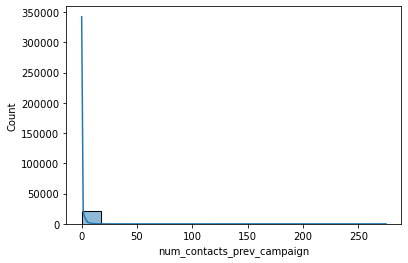

In [76]:
sns.histplot(data=train, x="num_contacts_prev_campaign", kde=True)
plt.show()

In [77]:
train.drop(['num_contacts_in_campaign','num_contacts_prev_campaign'],1,inplace = True)

In [78]:
test.drop(['num_contacts_in_campaign','num_contacts_prev_campaign'],1,inplace = True)

In [79]:
train = pd.get_dummies(data=train, columns=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'], drop_first = True)

In [80]:
test = pd.get_dummies(data=test, columns=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'], drop_first = True)

# Final model  

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [209]:
y_train = train.term_deposit_subscribed
X_train = train.drop('term_deposit_subscribed',1)

In [210]:
test2 = test.dropna()
y_test = test2.term_deposit_subscribed
X_test = test2.drop('term_deposit_subscribed',1)

In [211]:
test2.shape

(9108, 40)

In [212]:
from imblearn.over_sampling import SMOTE 
smote_ = SMOTE(random_state=42)
X_res, y_res = smote_.fit_resample(X_train, y_train)

In [213]:
y_res.value_counts()

0    19742
1    19742
Name: term_deposit_subscribed, dtype: int64

In [214]:
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly_features_2.fit_transform(X_res)

In [95]:
estimator = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7)
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

clf = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid)
clf = clf.fit(X_train_poly2, y_res)

results = clf.cv_results_
best_run = np.argmax(results['mean_test_score'])
best_c = results['params'][best_run]['C']
best_lambda = 1/best_c * 1/len(y_train) * 1/2
print('Best C: {}'.format(best_c))
print('Best lambda: {}'.format(best_lambda))

KeyboardInterrupt: 

In [215]:
clf = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7, C=1000, tol=0.001)
clf.fit(X_train_poly2, y_res)

LogisticRegression(C=1000, l1_ratio=0.7, penalty='elasticnet', solver='saga',
                   tol=0.001)

In [216]:
clf.predict_proba(X_train_poly2)

array([[0.15166539, 0.84833461],
       [0.78351896, 0.21648104],
       [0.10265385, 0.89734615],
       ...,
       [0.51199283, 0.48800717],
       [0.08934639, 0.91065361],
       [0.20978602, 0.79021398]])

In [217]:
y_train_pred = pd.DataFrame(clf.predict_proba(X_train_poly2), columns=clf.classes_).drop(0, axis = 1)
y_train_pred

,1
0,0.848335
1,0.216481
2,0.897346
3,0.491320
4,0.534704
...,...
39479,0.447016
39480,0.861170
39481,0.488007
39482,0.910654


##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [218]:
y_train_pred_final = pd.DataFrame(columns = {'term_deposit_subscribed':y_res, 'term_deposit_subscribed_Prob':y_train_pred})
y_train_pred_final.term_deposit_subscribed = y_res
y_train_pred_final.term_deposit_subscribed_Prob = y_train_pred

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,1,0.848335
1,0,0.216481
2,0,0.897346
3,0,0.491320
4,0,0.534704


### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [219]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.848335,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.216481,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.897346,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.491320,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.534704,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [220]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.01  0.01  0.500000  1.000000  0.000000
0.02  0.02  0.500000  1.000000  0.000000
0.03  0.03  0.500000  1.000000  0.000000
0.04  0.04  0.500000  1.000000  0.000000
...    ...       ...       ...       ...
0.95  0.95  0.525529  0.055972  0.995087
0.96  0.96  0.517222  0.037737  0.996708
0.97  0.97  0.506965  0.015500  0.998430
0.98  0.98  0.502127  0.004508  0.999747
0.99  0.99  0.500000  0.000000  1.000000

[100 rows x 4 columns]


In [221]:
cutoff_df.head(60)

,prob,accuracy,sensi,speci
0.00,0.00,0.500000,1.000000,0.000000
0.01,0.01,0.500000,1.000000,0.000000
0.02,0.02,0.500000,1.000000,0.000000
0.03,0.03,0.500000,1.000000,0.000000
0.04,0.04,0.500000,1.000000,0.000000
0.05,0.05,0.500000,1.000000,0.000000
0.06,0.06,0.500000,1.000000,0.000000
0.07,0.07,0.500025,1.000000,0.000051
0.08,0.08,0.500025,1.000000,0.000051
0.09,0.09,0.500127,1.000000,0.000253


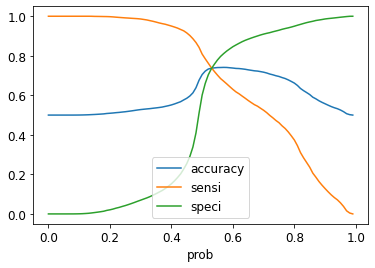

In [222]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [223]:
y_train_pred_final['final_predicted'] = y_train_pred_final.term_deposit_subscribed_Prob.map( lambda x: 1 if x > 0.53 else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.848335,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0.216481,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.897346,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0.491320,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.534704,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


Making predictions on the test set

In [224]:
tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.7369567419714315

In [225]:
speci = tn/(tn+fp)
speci 

0.7343734170803363

In [226]:
sensi = tp/(tp+fn)
sensi

0.7395400668625266

In [227]:
confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted)

array([[14498,  5244],
       [ 5142, 14600]], dtype=int64)

In [228]:
metrics.f1_score(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted)

0.7376345172535747

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74     19742
           1       0.74      0.74      0.74     19742

    accuracy                           0.74     39484
   macro avg       0.74      0.74      0.74     39484
weighted avg       0.74      0.74      0.74     39484



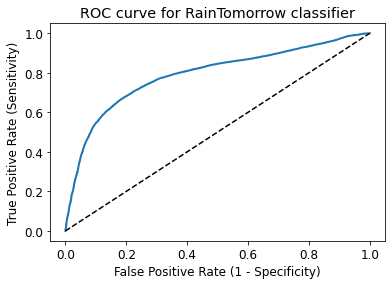

In [121]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.term_deposit_subscribed_Prob)
# fpr, tpr, thresholds = roc_curve(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted)
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [124]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.term_deposit_subscribed_Prob)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7900


# Predictions of testset

In [125]:
X_test_poly2 = poly_features_2.fit_transform(X_test)

In [126]:
clf.predict(X_test_poly2)
clf.predict_proba(X_test_poly2)
y_test_pred = pd.DataFrame(clf.predict_proba(X_test_poly2), columns=clf.classes_).drop(0, axis = 1)
y_test_pred

,1
0,0.474847
1,0.268529
2,0.490601
3,0.545599
4,0.440624
...,...
9103,0.584809
9104,0.497681
9105,0.152039
9106,0.532828


In [127]:
y_test.reset_index(drop = True,inplace = True)

In [128]:
y_test_pred['term_deposit_subscribed'] = y_test
y_test_pred

,1,term_deposit_subscribed
0,0.474847,0
1,0.268529,0
2,0.490601,0
3,0.545599,1
4,0.440624,0
...,...,...
9103,0.584809,0
9104,0.497681,0
9105,0.152039,0
9106,0.532828,0


In [129]:
# Renaming the column 
y_test_pred = y_test_pred.rename(columns={ 1 : 'term_deposit_subscribed_Prob'})

In [130]:
# Rearranging the columns
y_test_pred = y_test_pred.reindex(['term_deposit_subscribed','term_deposit_subscribed_Prob'], axis=1)

In [131]:
# Let's see the head of y_pred_final
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,0,0.474847
1,0,0.268529
2,0,0.490601
3,1,0.545599
4,0,0.440624


In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_test_pred[i]= y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0,0.474847,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.268529,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.490601,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.545599,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.440624,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df2 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df2)

      prob  accuracy     sensi     speci
0.00  0.00  0.104633  1.000000  0.000000
0.01  0.01  0.111550  0.991605  0.008706
0.02  0.02  0.114734  0.991605  0.012262
0.03  0.03  0.117150  0.991605  0.014960
0.04  0.04  0.119126  0.991605  0.017167
...    ...       ...       ...       ...
0.95  0.95  0.899758  0.244491  0.976334
0.96  0.96  0.900198  0.230850  0.978418
0.97  0.97  0.901296  0.219307  0.980993
0.98  0.98  0.901735  0.194124  0.984427
0.99  0.99  0.901735  0.162644  0.988105

[100 rows x 4 columns]


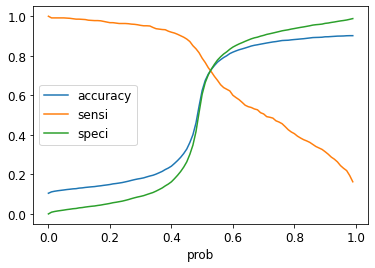

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df2.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [135]:
y_test_pred['predicted'] = y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > 0.53 else 0)

# Let's see the head
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,predicted
0,0,0.474847,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.268529,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.490601,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.545599,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0.440624,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred.predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.7311155028546333

In [137]:
speci = tn/(tn+fp)
speci 

0.7325567136725935

In [138]:
sensi = tp/(tp+fn)
sensi

0.7187827911857293

In [193]:
confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred.predicted)

array([[5974, 2181],
       [ 268,  685]], dtype=int64)

In [229]:
metrics.f1_score(y_test_pred.term_deposit_subscribed, y_test_pred.predicted)

0.35873265252683945

In [143]:
print(classification_report(y_test_pred.term_deposit_subscribed, y_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      8155
           1       0.24      0.72      0.36       953

    accuracy                           0.73      9108
   macro avg       0.60      0.73      0.59      9108
weighted avg       0.88      0.73      0.78      9108



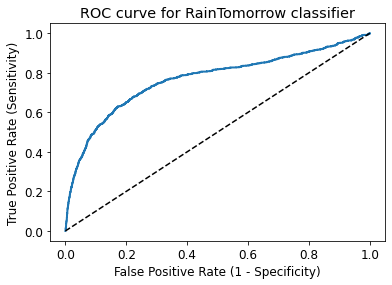

In [144]:
# plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test_pred.term_deposit_subscribed, y_test_pred.term_deposit_subscribed_Prob)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [145]:
# compute ROC AUC
ROC_AUC = roc_auc_score(y_test_pred.term_deposit_subscribed, y_test_pred.term_deposit_subscribed_Prob)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7670


In [231]:
print(classification_report(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74     19742
           1       0.74      0.74      0.74     19742

    accuracy                           0.74     39484
   macro avg       0.74      0.74      0.74     39484
weighted avg       0.74      0.74      0.74     39484



In [232]:
print(classification_report(y_test_pred.term_deposit_subscribed, y_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      8155
           1       0.24      0.72      0.36       953

    accuracy                           0.73      9108
   macro avg       0.60      0.73      0.59      9108
weighted avg       0.88      0.73      0.78      9108



The f-1 score of train and test has a wide difference there could be following reasons

For heavy imbalancing like 1:10 added with outliers doesn't make an ideal data for a logistic regression model. We also noticed that features should be polynomial, for linear parameters (degree = 1), logistic had worst performance. This performance is improved a little but we are realising that this problem is more suited for a non-linear classifier. 
    

# Assumption of Logistic  Regression

We have not verified the assumption for logistic regression in this problem but it is practically suggested to do the same.

# Doing PCA Rough work

In [191]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
train_pca = pca.fit_transform(X_res)
train_pca.shape

(39484, 1)

In [179]:
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly_features_2.fit_transform(train_pca)


In [180]:
X_train_poly2.shape

(39484, 3)

In [181]:
clf = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7, C=1000, tol=0.001)
clf.fit(X_train_poly2, y_res)

LogisticRegression(C=1000, l1_ratio=0.7, penalty='elasticnet', solver='saga',
                   tol=0.001)

In [182]:
clf.predict_proba(X_train_poly2)

array([[0.49995672, 0.50004328],
       [0.46111258, 0.53888742],
       [0.49990384, 0.50009616],
       ...,
       [0.49278558, 0.50721442],
       [0.49023651, 0.50976349],
       [0.49167337, 0.50832663]])

In [183]:
y_train_pred = pd.DataFrame(clf.predict_proba(X_train_poly2), columns=clf.classes_).drop(0, axis = 1)
y_train_pred

,1
0,0.500043
1,0.538887
2,0.500096
3,0.508445
4,0.500946
...,...
39479,0.504493
39480,0.500763
39481,0.507214
39482,0.509763


##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [184]:
y_train_pred_final = pd.DataFrame(columns = {'term_deposit_subscribed':y_res, 'term_deposit_subscribed_Prob':y_train_pred})
y_train_pred_final.term_deposit_subscribed = y_res
y_train_pred_final.term_deposit_subscribed_Prob = y_train_pred

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,1,0.500043
1,0,0.538887
2,0,0.500096
3,0,0.508445
4,0,0.500946


### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [185]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.500043,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.538887,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.500096,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.508445,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.500946,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00       0.5    1.0    0.0
0.01  0.01       0.5    1.0    0.0
0.02  0.02       0.5    1.0    0.0
0.03  0.03       0.5    1.0    0.0
0.04  0.04       0.5    1.0    0.0
...    ...       ...    ...    ...
0.95  0.95       0.5    0.0    1.0
0.96  0.96       0.5    0.0    1.0
0.97  0.97       0.5    0.0    1.0
0.98  0.98       0.5    0.0    1.0
0.99  0.99       0.5    0.0    1.0

[100 rows x 4 columns]


In [187]:
cutoff_df.head(60)

,prob,accuracy,sensi,speci
0.00,0.00,0.500000,1.000000,0.000000
0.01,0.01,0.500000,1.000000,0.000000
0.02,0.02,0.500000,1.000000,0.000000
0.03,0.03,0.500000,1.000000,0.000000
0.04,0.04,0.500000,1.000000,0.000000
0.05,0.05,0.500000,1.000000,0.000000
0.06,0.06,0.500000,1.000000,0.000000
0.07,0.07,0.500000,1.000000,0.000000
0.08,0.08,0.500000,1.000000,0.000000
0.09,0.09,0.500000,1.000000,0.000000


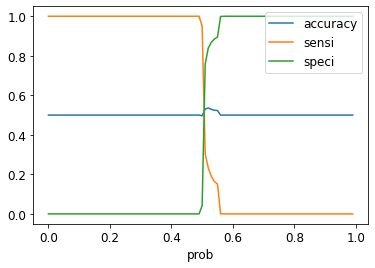

In [188]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# Didn't get good results hence dropped idea of doing PCA. 

### Modelling Rough Work

In [284]:
import statsmodels.api as sm

In [230]:
y_train = train.term_deposit_subscribed
X_train = train.drop('term_deposit_subscribed',1)

In [392]:
test2 = test.dropna()
y_test = test2.term_deposit_subscribed
X_test = test2.drop('term_deposit_subscribed',1)

In [394]:
test2.shape

(9108, 40)

In [287]:
from imblearn.over_sampling import SMOTE 
smote_ = SMOTE(random_state=42)
X_res, y_res = smote_.fit_resample(X_train, y_train)

In [288]:
y_res.value_counts()

0    19742
1    19742
Name: term_deposit_subscribed, dtype: int64

In [483]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

estimator = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7)
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

clf = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid)
clf = clf.fit(X_res, y_res)

results = clf.cv_results_
best_run = np.argmax(results['mean_test_score'])
best_c = results['params'][best_run]['C']
best_lambda = 1/best_c * 1/len(y_train) * 1/2
print('Best C: {}'.format(best_c))
print('Best lambda: {}'.format(best_lambda))

Best C: 10
Best lambda: 2.25713253882268e-06


In [484]:
clf = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7, C=1000, tol=0.001)
clf = clf.fit(X_res, y_res)

In [485]:
sklearn_preds = clf.predict(X_res)

In [486]:
clf.predict_proba(X_res)

array([[0.20365206, 0.79634794],
       [0.73803478, 0.26196522],
       [0.08777762, 0.91222238],
       ...,
       [0.47384412, 0.52615588],
       [0.12710425, 0.87289575],
       [0.14300984, 0.85699016]])

In [487]:
y_train_pred = pd.DataFrame(clf.predict_proba(X_res), columns=clf.classes_).drop(0, axis = 1)
y_train_pred

,1
0,0.796348
1,0.261965
2,0.912222
3,0.060910
4,0.464902
...,...
39479,0.096204
39480,0.884376
39481,0.526156
39482,0.872896


In [293]:
# Check for the VIF values of the feature variables. 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [363]:
#### Checking VIFs

# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# vif = pd.DataFrame()
# vif['Features'] = X_res.columns
# vif['VIF'] = [variance_inflation_factor(X_res.values, i) for i in range(X_res.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [361]:
# # Getting the predicted values on the train set
# y_train_pred = res.predict(X_train_sm)
# y_train_pred[:10]

In [360]:
# y_train_pred = y_train_pred.values.reshape(-1)
# y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [488]:
y_train_pred_final = pd.DataFrame(columns = {'term_deposit_subscribed':y_res, 'term_deposit_subscribed_Prob':y_train_pred})
y_train_pred_final.term_deposit_subscribed = y_res
y_train_pred_final.term_deposit_subscribed_Prob = y_train_pred

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,1,0.796348
1,0,0.261965
2,0,0.912222
3,0,0.060910
4,0,0.464902


### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [489]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.796348,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.261965,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.912222,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
3,0,0.060910,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.464902,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [490]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.01  0.01  0.500000  1.000000  0.000000
0.02  0.02  0.500000  1.000000  0.000000
0.03  0.03  0.500000  1.000000  0.000000
0.04  0.04  0.500456  1.000000  0.000912
...    ...       ...       ...       ...
0.95  0.95  0.508408  0.018387  0.998430
0.96  0.96  0.504078  0.008763  0.999392
0.97  0.97  0.500988  0.002026  0.999949
0.98  0.98  0.500000  0.000000  1.000000
0.99  0.99  0.500000  0.000000  1.000000

[100 rows x 4 columns]


In [491]:
# (cutoff_df).head(20)

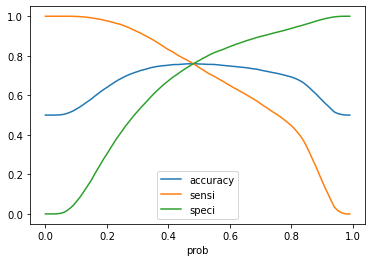

In [492]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [493]:
y_train_pred_final['final_predicted'] = y_train_pred_final.term_deposit_subscribed_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.796348,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0.261965,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.912222,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0.060910,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.464902,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Making predictions on the test set

In [494]:
tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.758433795967987

In [495]:
speci = tn/(tn+fp)
speci 

0.775909229054807

In [496]:
sensi = tp/(tp+fn)
sensi

0.740958362881167

In [497]:
# X_test_sm = sm.add_constant(X_test)

In [498]:
# y_test_pred = res.predict(X_test_sm)

In [499]:
sklearn_preds = clf.predict(X_test)
clf.predict_proba(X_test)
y_test_pred = pd.DataFrame(clf.predict_proba(X_test), columns=clf.classes_).drop(0, axis = 1)
y_test_pred

,1
0,0.222810
1,0.398669
2,0.307455
3,0.456043
4,0.109581
...,...
9103,0.519398
9104,0.265773
9105,0.274254
9106,0.488749


In [500]:
# Converting y_pred to a dataframe which is an array
# y_pred_1 = pd.DataFrame(y_test_pred)

In [501]:
# Let's see the head
# y_pred_1.head()

In [308]:
# Converting y_test to dataframe
# y_test_df = pd.DataFrame(y_test)

In [309]:
# Putting CustID to index
# y_test_df['ID'] = y_test_df.index

In [310]:
# Removing index for both dataframes to append them side by side 
# y_pred_1.reset_index(drop=True, inplace=True)
# y_test_df.reset_index(drop=True, inplace=True)

In [311]:
# Appending y_test_df and y_pred_1
# y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [502]:
y_test.reset_index(drop = True,inplace = True)

In [503]:
y_test_pred['term_deposit_subscribed'] = y_test
y_test_pred

,1,term_deposit_subscribed
0,0.222810,0
1,0.398669,0
2,0.307455,0
3,0.456043,1
4,0.109581,0
...,...,...
9103,0.519398,0
9104,0.265773,0
9105,0.274254,0
9106,0.488749,0


In [504]:
# Renaming the column 
y_test_pred = y_test_pred.rename(columns={ 1 : 'term_deposit_subscribed_Prob'})

In [505]:
# Rearranging the columns
y_test_pred = y_test_pred.reindex(['term_deposit_subscribed','term_deposit_subscribed_Prob'], axis=1)

In [506]:
# Let's see the head of y_pred_final
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,0,0.222810
1,0,0.398669
2,0,0.307455
3,1,0.456043
4,0,0.109581


In [507]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_test_pred[i]= y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0,0.222810,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.398669,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.307455,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.456043,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.109581,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [508]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df2 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df2)

      prob  accuracy     sensi     speci
0.00  0.00  0.104633  1.000000  0.000000
0.01  0.01  0.104633  1.000000  0.000000
0.02  0.02  0.104633  1.000000  0.000000
0.03  0.03  0.104633  1.000000  0.000000
0.04  0.04  0.105621  1.000000  0.001104
...    ...       ...       ...       ...
0.95  0.95  0.896794  0.262329  0.970938
0.96  0.96  0.897233  0.238195  0.974249
0.97  0.97  0.898112  0.205666  0.979031
0.98  0.98  0.898331  0.174187  0.982955
0.99  0.99  0.899429  0.135362  0.988719

[100 rows x 4 columns]


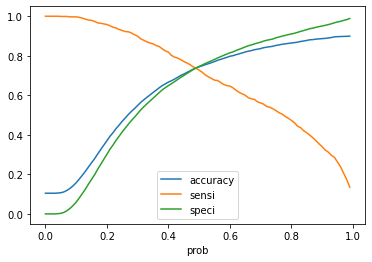

In [509]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df2.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [510]:
y_test_pred['predicted'] = y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,predicted
0,0,0.222810,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.398669,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.307455,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.456043,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.109581,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [511]:
tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred.predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy 

0.7441809398331137

In [512]:
speci = tn/(tn+fp)
speci 

0.7461679950950337

In [513]:
sensi = tp/(tp+fn)
sensi

0.727177334732424

In [658]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [659]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [660]:
X_train_poly1 = poly_features_1.fit_transform(X_res)
X_train_poly2 = poly_features_2.fit_transform(X_res)
X_train_poly3 = poly_features_3.fit_transform(X_res)

In [441]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_res)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

In [442]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_res)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

In [443]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_res)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

In [444]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.882411,0.783707,0.586188
1,Precision,0.648478,0.717733,0.857293
2,Recall,0.456425,0.286792,0.183596
3,F1 Score,0.535761,0.409826,0.302425


In [445]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_res)
y_train_predict = logisticRegr.predict(poly_features_1.fit_transform(X_train))
acc1 = metrics.accuracy_score(y_train_predict, y_train)
pre1 = metrics.precision_score(y_train_predict,y_train)
rec1 = metrics.recall_score(y_train_predict,y_train)
f1_1 = metrics.f1_score(y_train_predict,y_train)

In [451]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_res)
y_train_predict = logisticRegr.predict(poly_features_2.fit_transform(X_train))
acc2 = metrics.accuracy_score(y_train_predict, y_train)
pre2 = metrics.precision_score(y_train_predict,y_train)
rec2 = metrics.recall_score(y_train_predict,y_train)
f1_2 = metrics.f1_score(y_train_predict,y_train)

In [452]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_res)
y_train_predict = logisticRegr.predict(poly_features_3.fit_transform(X_train))
acc3 = metrics.accuracy_score(y_train_predict, y_train)
pre3 = metrics.precision_score(y_train_predict,y_train)
rec3 = metrics.recall_score(y_train_predict,y_train)
f1_3 = metrics.f1_score(y_train_predict,y_train)

In [453]:
print("Train Data Metrics")

Train Data Metrics


In [454]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.613218,0.782728,0.613218
1,Precision,0.817012,0.752282,0.817012
2,Recall,0.195028,0.300713,0.195028
3,F1 Score,0.314889,0.429672,0.314889


In [455]:
print("Test Metrics")

Test Metrics


In [444]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.882411,0.783707,0.586188
1,Precision,0.648478,0.717733,0.857293
2,Recall,0.456425,0.286792,0.183596
3,F1 Score,0.535761,0.409826,0.302425


In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_res)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
# acc2 = metrics.accuracy_score(y_test_predict, y_test)
# pre2 = metrics.precision_score(y_test_predict,y_test)
# rec2 = metrics.recall_score(y_test_predict,y_test)
# f1_2 = metrics.f1_score(y_test_predict,y_test)

In [661]:
# clf = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7, C=1000, tol=0.001)
poly_features_2 = PolynomialFeatures(degree=1)
X_train_poly2 = poly_features_2.fit_transform(X_res)
clf = LogisticRegression()
clf = clf.fit(X_train_poly2, y_res)

In [662]:
sklearn_preds = clf.predict(X_train_poly2)

In [663]:
clf.predict_proba(X_train_poly2)

array([[0.55235472, 0.44764528],
       [0.99449569, 0.00550431],
       [0.59819281, 0.40180719],
       ...,
       [0.16723218, 0.83276782],
       [0.06510579, 0.93489421],
       [0.0044468 , 0.9955532 ]])

In [664]:
y_train_pred = pd.DataFrame(clf.predict_proba(X_train_poly2), columns=clf.classes_).drop(0, axis = 1)
y_train_pred

,1
0,0.447645
1,0.005504
2,0.401807
3,0.000320
4,0.015110
...,...
39479,0.886490
39480,0.899407
39481,0.832768
39482,0.934894


In [293]:
# Check for the VIF values of the feature variables. 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [363]:
#### Checking VIFs

# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# vif = pd.DataFrame()
# vif['Features'] = X_res.columns
# vif['VIF'] = [variance_inflation_factor(X_res.values, i) for i in range(X_res.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [361]:
# # Getting the predicted values on the train set
# y_train_pred = res.predict(X_train_sm)
# y_train_pred[:10]

In [360]:
# y_train_pred = y_train_pred.values.reshape(-1)
# y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [665]:

y_train_pred_final = pd.DataFrame(columns = {'term_deposit_subscribed':y_res, 'term_deposit_subscribed_Prob':y_train_pred})
y_train_pred_final.term_deposit_subscribed = y_res
y_train_pred_final.term_deposit_subscribed_Prob = y_train_pred

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,1,0.447645
1,0,0.005504
2,0,0.401807
3,0,0.000320
4,0,0.015110


### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [666]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.447645,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.005504,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.401807,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.000320,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.015110,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [667]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.01  0.01  0.704589  0.999038  0.410141
0.02  0.02  0.764968  0.997011  0.532925
0.03  0.03  0.796677  0.995188  0.598166
0.04  0.04  0.819015  0.994377  0.643653
...    ...       ...       ...       ...
0.95  0.95  0.842392  0.691673  0.993111
0.96  0.96  0.828994  0.663104  0.994884
0.97  0.97  0.810252  0.624607  0.995897
0.98  0.98  0.783761  0.569699  0.997822
0.99  0.99  0.728700  0.458464  0.998936

[100 rows x 4 columns]


In [668]:
(cutoff_df).head(20)

,prob,accuracy,sensi,speci
0.00,0.00,0.500000,1.000000,0.000000
0.01,0.01,0.704589,0.999038,0.410141
0.02,0.02,0.764968,0.997011,0.532925
0.03,0.03,0.796677,0.995188,0.598166
0.04,0.04,0.819015,0.994377,0.643653
0.05,0.05,0.834642,0.992909,0.676375
0.06,0.06,0.845152,0.990984,0.699321
0.07,0.07,0.854675,0.989616,0.719735
0.08,0.08,0.862603,0.987083,0.738122
0.09,0.09,0.869188,0.985361,0.753014


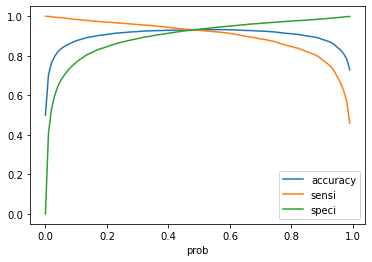

In [669]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [670]:
y_train_pred_final['final_predicted'] = y_train_pred_final.term_deposit_subscribed_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.447645,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.005504,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.401807,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.000320,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.015110,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Making predictions on the test set

In [671]:
tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.9315165636713606

In [672]:
speci = tn/(tn+fp)
speci 

0.9343531557086415

In [673]:
sensi = tp/(tp+fn)
sensi

0.9286799716340797

In [303]:
# X_test_sm = sm.add_constant(X_test)

In [304]:
# y_test_pred = res.predict(X_test_sm)

In [674]:
X_test_poly2 = poly_features_2.fit_transform(X_test)

In [675]:
sklearn_preds = clf.predict(X_test_poly2)
clf.predict_proba(X_test_poly2)
y_test_pred = pd.DataFrame(clf.predict_proba(X_test_poly2), columns=clf.classes_).drop(0, axis = 1)
y_test_pred

,1
0,0.021512
1,0.048424
2,0.024209
3,0.578681
4,0.006924
...,...
9103,0.005148
9104,0.020035
9105,0.028357
9106,0.042948


In [676]:
# Converting y_pred to a dataframe which is an array
# y_pred_1 = pd.DataFrame(y_test_pred)

In [677]:
# Let's see the head
# y_pred_1.head()

In [678]:
# Converting y_test to dataframe
# y_test_df = pd.DataFrame(y_test)

In [679]:
# Putting CustID to index
# y_test_df['ID'] = y_test_df.index

In [680]:
# Removing index for both dataframes to append them side by side 
# y_pred_1.reset_index(drop=True, inplace=True)
# y_test_df.reset_index(drop=True, inplace=True)

In [681]:
# Appending y_test_df and y_pred_1
# y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [682]:
y_test.reset_index(drop = True,inplace = True)

In [683]:
y_test_pred['term_deposit_subscribed'] = y_test
y_test_pred

,1,term_deposit_subscribed
0,0.021512,0
1,0.048424,0
2,0.024209,0
3,0.578681,1
4,0.006924,0
...,...,...
9103,0.005148,0
9104,0.020035,0
9105,0.028357,0
9106,0.042948,0


In [684]:
# Renaming the column 
y_test_pred = y_test_pred.rename(columns={ 1 : 'term_deposit_subscribed_Prob'})

In [685]:
# Rearranging the columns
y_test_pred = y_test_pred.reindex(['term_deposit_subscribed','term_deposit_subscribed_Prob'], axis=1)

In [686]:
# Let's see the head of y_pred_final
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,0,0.021512
1,0,0.048424
2,0,0.024209
3,1,0.578681
4,0,0.006924


In [687]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_test_pred[i]= y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0,0.021512,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.048424,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.024209,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.578681,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.006924,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [688]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df2 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df2)

      prob  accuracy     sensi     speci
0.00  0.00  0.104633  1.000000  0.000000
0.01  0.01  0.459047  0.989507  0.397057
0.02  0.02  0.572244  0.977964  0.524831
0.03  0.03  0.634278  0.971668  0.594850
0.04  0.04  0.671498  0.956978  0.638136
...    ...       ...       ...       ...
0.95  0.95  0.907444  0.281217  0.980625
0.96  0.96  0.906456  0.251836  0.982955
0.97  0.97  0.905468  0.221406  0.985408
0.98  0.98  0.904919  0.186779  0.988841
0.99  0.99  0.902503  0.140609  0.991539

[100 rows x 4 columns]


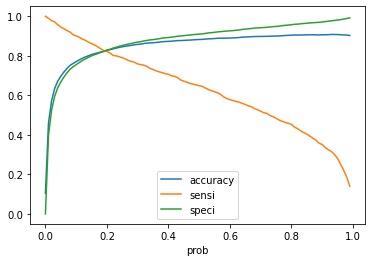

In [689]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df2.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [690]:
y_test_pred['predicted'] = y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,predicted
0,0,0.021512,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.048424,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.024209,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.578681,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0.006924,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [691]:
tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred.predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy 

0.8824110671936759

In [692]:
speci = tn/(tn+fp)
speci 

0.9097486204782342

In [693]:
sensi = tp/(tp+fn)
sensi

0.6484784889821616

## Stats Model API 

In [588]:
X_train_sm = sm.add_constant(X_res)

In [589]:
logm2 = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res = logm2.fit_regularized(method = 'elastic_net',maxiter = 1000)
# res = logm2.fit()

In [590]:
res = logm2.fit()

In [591]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     term_deposit_subscribed   No. Observations:                39484
Model:                                 GLM   Df Residuals:                    39444
Model Family:                     Binomial   Df Model:                           39
Link Function:                       logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -6292.1
Date:                     Tue, 01 Mar 2022   Deviance:                       12584.
Time:                             09:19:12   Pearson chi2:                 2.91e+04
No. Iterations:                          8                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             3.6603      0.156     23.537      0.000       3.356       3.965
customer_age                     -0.0155      0.003     -5.679      0.000      -0.021      -0.010
balance                           0.0001   2.04e-05      5.869      0.000    7.97e-05       0.000
day_of_month                     -0.0002      0.003     -0.075      0.940      -0.007       0.006
last_contact_duration             0.0093      0.000     62.642      0.000       0.009       0.010
job_type_blue-collar             -2.2951      0.081    -28.164      0.000      -2.455      -2.135
job_type_entrepreneur            -1.9734      0.170    -11.585      0.000      -2.307      -1.640
job_type_housemaid               -2.9847      0.202    -14.805      0.000      -3.380      -2.590
job_type_management              -1.6291      0.083    -19.739      0.000      -1.791      -1.467
job_type_retired                 -1.7102      0.114    -14.981      0.000      -1.934      -1.486
job_type_self-employed           -2.1708      0.155    -13.980      0.000      -2.475      -1.866
job_type_services                -1.8911      0.110    -17.114      0.000      -2.108      -1.674
job_type_student                 -1.3611      0.156     -8.739      0.000      -1.666      -1.056
job_type_technician              -1.6977      0.082    -20.783      0.000      -1.858      -1.538
job_type_unemployed              -2.1804      0.158    -13.801      0.000      -2.490      -1.871
job_type_unknown                 -2.0751      0.366     -5.677      0.000      -2.792      -1.359
marital_married                  -1.2001      0.063    -19.177      0.000      -1.323      -1.077
marital_single                   -1.0365      0.074    -13.977      0.000      -1.182      -0.891
education_secondary              -1.3213      0.065    -20.191      0.000      -1.450      -1.193
education_tertiary               -0.9499      0.081    -11.693      0.000      -1.109      -0.791
education_unknown                -1.5688      0.155    -10.107      0.000      -1.873      -1.265
default_yes                      -0.1755      0.260     -0.674      0.500      -0.686       0.335
housing_loan_yes                 -1.6532      0.057    -29.119      0.000      -1.764      -1.542
personal_loan_yes                -0.9340      0.088    -10.558      0.000      -1.107      -0.761
communication_type_telephone     -0.5139      0.114     -4.514      0.000      -0.737      -0.291
communication_type_unknown       -1.3451      0.094    -14.302      0.000      -1.529      -1.161
month_aug                        -3.1939      0.092    -34.863      0.000      -3.373      -3.014
month_dec                        -1.5651      0.279     -5.612      0.000      -2.112   

In [ ]:
# print vif

In [592]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [593]:
#### Checking VIFs
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_res.columns
vif['VIF'] = [variance_inflation_factor(X_res.values, i) for i in range(X_res.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,customer_age,9.91
2,day_of_month,5.02
38,prev_campaign_outcome_unknown,4.37
3,last_contact_duration,3.69
32,month_may,3.13
15,marital_married,3.09
24,communication_type_unknown,2.79
18,education_tertiary,2.62
17,education_secondary,2.60
21,housing_loan_yes,2.43


In [594]:
# # Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.299284
1    0.007041
2    0.531963
3    0.000618
4    0.036682
5    0.006102
6    0.024490
7    0.815894
8    0.002059
9    0.000309
dtype: float64

In [595]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.99283713e-01, 7.04062132e-03, 5.31962663e-01, 6.18014310e-04,
       3.66816900e-02, 6.10152520e-03, 2.44897385e-02, 8.15893511e-01,
       2.05886319e-03, 3.09015999e-04])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [596]:
y_train_pred_final = pd.DataFrame(columns = {'term_deposit_subscribed':y_res, 'term_deposit_subscribed_Prob':y_train_pred})
y_train_pred_final.term_deposit_subscribed = y_res
y_train_pred_final.term_deposit_subscribed_Prob = y_train_pred

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,1,0.299284
1,0,0.007041
2,0,0.531963
3,0,0.000618
4,0,0.036682


### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [597]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.299284,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.007041,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.531963,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.000618,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.036682,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [598]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.01  0.01  0.707780  0.998987  0.416574
0.02  0.02  0.775377  0.997771  0.552983
0.03  0.03  0.811468  0.996404  0.626532
0.04  0.04  0.832666  0.995036  0.670297
...    ...       ...       ...       ...
0.95  0.95  0.867111  0.739996  0.994226
0.96  0.96  0.856018  0.716847  0.995188
0.97  0.97  0.837757  0.678857  0.996657
0.98  0.98  0.810556  0.623240  0.997873
0.99  0.99  0.764639  0.530443  0.998835

[100 rows x 4 columns]


In [599]:
# (cutoff_df).head(20)

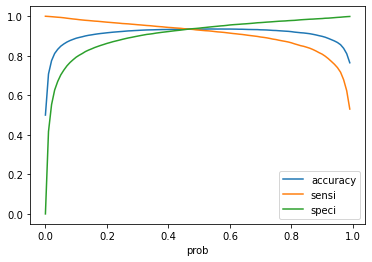

In [600]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [601]:
y_train_pred_final['final_predicted'] = y_train_pred_final.term_deposit_subscribed_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.299284,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.007041,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.531963,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0.000618,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.036682,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Making predictions on the test set

In [602]:
tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.9347583831425388

In [603]:
speci = tn/(tn+fp)
speci 

0.9397224192077803

In [604]:
sensi = tp/(tp+fn)
sensi

0.9297943470772971

In [605]:
X_test_sm = sm.add_constant(X_test)

In [606]:
y_test_pred = res.predict(X_test_sm)
y_test_pred

0       0.008830
1       0.022945
2       0.014095
3       0.683129
4       0.001412
          ...   
9490    0.005491
9491    0.006254
9492    0.012519
9493    0.025906
9494    0.027765
Length: 9108, dtype: float64

In [607]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [608]:
# Let's see the head
y_pred_1.head()

,0
0,0.008830
1,0.022945
2,0.014095
3,0.683129
4,0.001412


In [609]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,term_deposit_subscribed
0,0
1,0
2,0
3,1
4,0
...,...
9103,0
9104,0
9105,0
9106,0


In [610]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [611]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final

,term_deposit_subscribed,0
0,0,0.008830
1,0,0.022945
2,0,0.014095
3,1,0.683129
4,0,0.001412
...,...,...
9103,0,0.005491
9104,0,0.006254
9105,0,0.012519
9106,0,0.025906


In [612]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns={ 0 : 'term_deposit_subscribed_Prob'})

In [613]:
# Let's see the head of y_pred_final
y_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,0,0.008830
1,0,0.022945
2,0,0.014095
3,1,0.683129
4,0,0.001412


In [614]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_pred_final[i]= y_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0,0.008830,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.022945,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.014095,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.683129,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.001412,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [615]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df2 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_pred_final.term_deposit_subscribed, y_pred_final[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df2)

      prob  accuracy     sensi     speci
0.00  0.00  0.104633  1.000000  0.000000
0.01  0.01  0.472222  0.991605  0.411527
0.02  0.02  0.593764  0.979014  0.548743
0.03  0.03  0.648990  0.968520  0.611649
0.04  0.04  0.688625  0.953830  0.657633
...    ...       ...       ...       ...
0.95  0.95  0.906456  0.261280  0.981852
0.96  0.96  0.905578  0.236097  0.983814
0.97  0.97  0.905687  0.214061  0.986511
0.98  0.98  0.904370  0.183631  0.988596
0.99  0.99  0.902613  0.137461  0.992029

[100 rows x 4 columns]


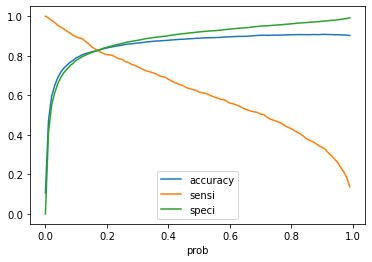

In [616]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df2.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [617]:
y_pred_final['predicted'] = y_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,predicted
0,0,0.008830,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.022945,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.014095,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.683129,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0.001412,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [618]:
tn, fp, fn, tp = confusion_matrix(y_pred_final.term_deposit_subscribed, y_pred_final.predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy 

0.88866930171278

In [619]:
speci = tn/(tn+fp)
speci 

0.9205395462906193

In [620]:
sensi = tp/(tp+fn)
sensi

0.6159496327387198

In [432]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [433]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [439]:
X_train_poly1 = poly_features_1.fit_transform(X_res)
X_train_poly2 = poly_features_2.fit_transform(X_res)
X_train_poly3 = poly_features_3.fit_transform(X_res)

In [621]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_res)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

In [442]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_res)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

In [443]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_res)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

In [444]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.882411,0.783707,0.586188
1,Precision,0.648478,0.717733,0.857293
2,Recall,0.456425,0.286792,0.183596
3,F1 Score,0.535761,0.409826,0.302425


In [445]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_res)
y_train_predict = logisticRegr.predict(poly_features_1.fit_transform(X_train))
acc1 = metrics.accuracy_score(y_train_predict, y_train)
pre1 = metrics.precision_score(y_train_predict,y_train)
rec1 = metrics.recall_score(y_train_predict,y_train)
f1_1 = metrics.f1_score(y_train_predict,y_train)

In [451]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_res)
y_train_predict = logisticRegr.predict(poly_features_2.fit_transform(X_train))
acc2 = metrics.accuracy_score(y_train_predict, y_train)
pre2 = metrics.precision_score(y_train_predict,y_train)
rec2 = metrics.recall_score(y_train_predict,y_train)
f1_2 = metrics.f1_score(y_train_predict,y_train)

In [452]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_res)
y_train_predict = logisticRegr.predict(poly_features_3.fit_transform(X_train))
acc3 = metrics.accuracy_score(y_train_predict, y_train)
pre3 = metrics.precision_score(y_train_predict,y_train)
rec3 = metrics.recall_score(y_train_predict,y_train)
f1_3 = metrics.f1_score(y_train_predict,y_train)

In [453]:
print("Train Data Metrics")

Train Data Metrics


In [454]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.613218,0.782728,0.613218
1,Precision,0.817012,0.752282,0.817012
2,Recall,0.195028,0.300713,0.195028
3,F1 Score,0.314889,0.429672,0.314889


In [455]:
print("Test Metrics")

Test Metrics


In [444]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.882411,0.783707,0.586188
1,Precision,0.648478,0.717733,0.857293
2,Recall,0.456425,0.286792,0.183596
3,F1 Score,0.535761,0.409826,0.302425


In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_res)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
# acc2 = metrics.accuracy_score(y_test_predict, y_test)
# pre2 = metrics.precision_score(y_test_predict,y_test)
# rec2 = metrics.recall_score(y_test_predict,y_test)
# f1_2 = metrics.f1_score(y_test_predict,y_test)

In [694]:
# clf = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7, C=1000, tol=0.001)
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly_features_2.fit_transform(X_res)
clf = LogisticRegression()
clf = clf.fit(X_train_poly2, y_res)

In [695]:
sklearn_preds = clf.predict(X_train_poly2)

In [696]:
clf.predict_proba(X_train_poly2)

array([[0.39586756, 0.60413244],
       [0.98938545, 0.01061455],
       [0.14301632, 0.85698368],
       ...,
       [0.2873614 , 0.7126386 ],
       [0.05531253, 0.94468747],
       [0.02256853, 0.97743147]])

In [697]:
y_train_pred = pd.DataFrame(clf.predict_proba(X_train_poly2), columns=clf.classes_).drop(0, axis = 1)
y_train_pred

,1
0,0.604132
1,0.010615
2,0.856984
3,0.111442
4,0.474357
...,...
39479,0.200053
39480,0.867341
39481,0.712639
39482,0.944687


In [698]:
# Check for the VIF values of the feature variables. 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [699]:
#### Checking VIFs

# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# vif = pd.DataFrame()
# vif['Features'] = X_res.columns
# vif['VIF'] = [variance_inflation_factor(X_res.values, i) for i in range(X_res.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [700]:
# # Getting the predicted values on the train set
# y_train_pred = res.predict(X_train_sm)
# y_train_pred[:10]

In [701]:
# y_train_pred = y_train_pred.values.reshape(-1)
# y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [702]:

y_train_pred_final = pd.DataFrame(columns = {'term_deposit_subscribed':y_res, 'term_deposit_subscribed_Prob':y_train_pred})
y_train_pred_final.term_deposit_subscribed = y_res
y_train_pred_final.term_deposit_subscribed_Prob = y_train_pred

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,1,0.604132
1,0,0.010615
2,0,0.856984
3,0,0.111442
4,0,0.474357


### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [703]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.604132,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.010615,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.856984,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.111442,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.474357,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [704]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.01  0.01  0.525631  0.999595  0.051666
0.02  0.02  0.535964  0.999088  0.072840
0.03  0.03  0.542878  0.998430  0.087327
0.04  0.04  0.548805  0.998126  0.099483
...    ...       ...       ...       ...
0.95  0.95  0.660698  0.340391  0.981005
0.96  0.96  0.647047  0.309594  0.984500
0.97  0.97  0.628179  0.268666  0.987691
0.98  0.98  0.605536  0.218873  0.992199
0.99  0.99  0.573802  0.151707  0.995897

[100 rows x 4 columns]


In [705]:
(cutoff_df).head(20)

,prob,accuracy,sensi,speci
0.00,0.00,0.500000,1.000000,0.000000
0.01,0.01,0.525631,0.999595,0.051666
0.02,0.02,0.535964,0.999088,0.072840
0.03,0.03,0.542878,0.998430,0.087327
0.04,0.04,0.548805,0.998126,0.099483
0.05,0.05,0.554098,0.997467,0.110728
0.06,0.06,0.557821,0.996859,0.118782
0.07,0.07,0.562481,0.996100,0.128862
0.08,0.08,0.567268,0.995644,0.138892
0.09,0.09,0.571599,0.995036,0.148161


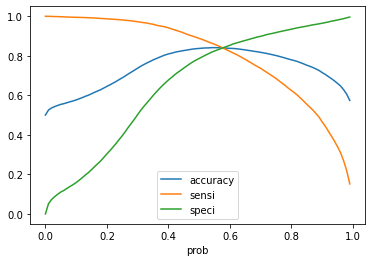

In [706]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [707]:
y_train_pred_final['final_predicted'] = y_train_pred_final.term_deposit_subscribed_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.604132,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0.010615,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.856984,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0.111442,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.474357,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Making predictions on the test set

In [708]:
tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.837073244858677

In [709]:
speci = tn/(tn+fp)
speci 

0.7864451423361362

In [710]:
sensi = tp/(tp+fn)
sensi

0.8877013473812178

In [711]:
# X_test_sm = sm.add_constant(X_test)

In [712]:
# y_test_pred = res.predict(X_test_sm)

In [713]:
X_test_poly2 = poly_features_2.fit_transform(X_test)

In [714]:
sklearn_preds = clf.predict(X_test_poly2)
clf.predict_proba(X_test_poly2)
y_test_pred = pd.DataFrame(clf.predict_proba(X_test_poly2), columns=clf.classes_).drop(0, axis = 1)
y_test_pred

,1
0,0.317791
1,0.059563
2,0.295889
3,0.740130
4,0.189772
...,...
9103,0.680267
9104,0.426956
9105,0.001478
9106,0.150221


In [715]:
# Converting y_pred to a dataframe which is an array
# y_pred_1 = pd.DataFrame(y_test_pred)

In [716]:
# Let's see the head
# y_pred_1.head()

In [717]:
# Converting y_test to dataframe
# y_test_df = pd.DataFrame(y_test)

In [718]:
# Putting CustID to index
# y_test_df['ID'] = y_test_df.index

In [719]:
# Removing index for both dataframes to append them side by side 
# y_pred_1.reset_index(drop=True, inplace=True)
# y_test_df.reset_index(drop=True, inplace=True)

In [720]:
# Appending y_test_df and y_pred_1
# y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [721]:
y_test.reset_index(drop = True,inplace = True)

In [722]:
y_test_pred['term_deposit_subscribed'] = y_test
y_test_pred

,1,term_deposit_subscribed
0,0.317791,0
1,0.059563,0
2,0.295889,0
3,0.740130,1
4,0.189772,0
...,...,...
9103,0.680267,0
9104,0.426956,0
9105,0.001478,0
9106,0.150221,0


In [723]:
# Renaming the column 
y_test_pred = y_test_pred.rename(columns={ 1 : 'term_deposit_subscribed_Prob'})

In [724]:
# Rearranging the columns
y_test_pred = y_test_pred.reindex(['term_deposit_subscribed','term_deposit_subscribed_Prob'], axis=1)

In [725]:
# Let's see the head of y_pred_final
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,0,0.317791
1,0,0.059563
2,0,0.295889
3,1,0.740130
4,0,0.189772


In [726]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_test_pred[i]= y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0,0.317791,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.059563,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.295889,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.740130,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.189772,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [727]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df2 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df2)

      prob  accuracy     sensi     speci
0.00  0.00  0.104743  1.000000  0.000123
0.01  0.01  0.177536  0.949633  0.087308
0.02  0.02  0.189394  0.945435  0.101042
0.03  0.03  0.198177  0.939140  0.111588
0.04  0.04  0.204985  0.933893  0.119804
...    ...       ...       ...       ...
0.95  0.95  0.900088  0.314795  0.968486
0.96  0.96  0.900088  0.294858  0.970815
0.97  0.97  0.900417  0.269675  0.974126
0.98  0.98  0.901186  0.250787  0.977192
0.99  0.99  0.902723  0.213012  0.983323

[100 rows x 4 columns]


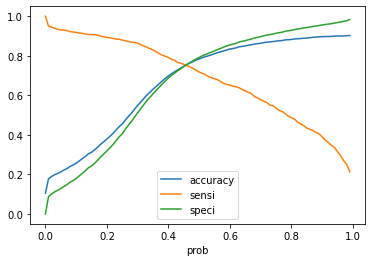

In [728]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df2.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [729]:
y_test_pred['predicted'] = y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,predicted
0,0,0.317791,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.059563,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.295889,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.740130,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0.189772,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [730]:
tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred.predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy 

0.7837066315327185

In [731]:
speci = tn/(tn+fp)
speci 

0.7914163090128755

In [732]:
sensi = tp/(tp+fn)
sensi

0.7177334732423925

# Poly deg 3

In [733]:
# clf = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7, C=1000, tol=0.001)
poly_features_2 = PolynomialFeatures(degree=3)
X_train_poly2 = poly_features_2.fit_transform(X_res)
clf = LogisticRegression()
clf = clf.fit(X_train_poly2, y_res)

In [734]:
sklearn_preds = clf.predict(X_train_poly2)

In [735]:
clf.predict_proba(X_train_poly2)

array([[0.18067005, 0.81932995],
       [0.99759206, 0.00240794],
       [0.26091449, 0.73908551],
       ...,
       [0.31771345, 0.68228655],
       [0.23121905, 0.76878095],
       [0.16023756, 0.83976244]])

In [736]:
y_train_pred = pd.DataFrame(clf.predict_proba(X_train_poly2), columns=clf.classes_).drop(0, axis = 1)
y_train_pred

,1
0,0.819330
1,0.002408
2,0.739086
3,0.499387
4,0.544840
...,...
39479,0.531336
39480,0.847863
39481,0.682287
39482,0.768781


In [737]:
# Check for the VIF values of the feature variables. 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [738]:
#### Checking VIFs

# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# vif = pd.DataFrame()
# vif['Features'] = X_res.columns
# vif['VIF'] = [variance_inflation_factor(X_res.values, i) for i in range(X_res.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [739]:
# # Getting the predicted values on the train set
# y_train_pred = res.predict(X_train_sm)
# y_train_pred[:10]

In [740]:
# y_train_pred = y_train_pred.values.reshape(-1)
# y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [741]:

y_train_pred_final = pd.DataFrame(columns = {'term_deposit_subscribed':y_res, 'term_deposit_subscribed_Prob':y_train_pred})
y_train_pred_final.term_deposit_subscribed = y_res
y_train_pred_final.term_deposit_subscribed_Prob = y_train_pred

y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,1,0.819330
1,0,0.002408
2,0,0.739086
3,0,0.499387
4,0,0.544840


### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [742]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.819330,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.002408,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.739086,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.499387,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.544840,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [743]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.01  0.01  0.535407  0.998227  0.072586
0.02  0.02  0.542777  0.997113  0.088441
0.03  0.03  0.548019  0.996505  0.099534
0.04  0.04  0.551616  0.995492  0.107740
...    ...       ...       ...       ...
0.95  0.95  0.585376  0.178553  0.992199
0.96  0.96  0.580311  0.167207  0.993415
0.97  0.97  0.574106  0.153834  0.994377
0.98  0.98  0.566508  0.137372  0.995644
0.99  0.99  0.554098  0.111083  0.997113

[100 rows x 4 columns]


In [744]:
(cutoff_df).head(20)

,prob,accuracy,sensi,speci
0.00,0.00,0.500000,1.000000,0.000000
0.01,0.01,0.535407,0.998227,0.072586
0.02,0.02,0.542777,0.997113,0.088441
0.03,0.03,0.548019,0.996505,0.099534
0.04,0.04,0.551616,0.995492,0.107740
0.05,0.05,0.554047,0.994935,0.113160
0.06,0.06,0.557568,0.994479,0.120656
0.07,0.07,0.560100,0.994124,0.126076
0.08,0.08,0.562937,0.993618,0.132256
0.09,0.09,0.565343,0.993111,0.137575


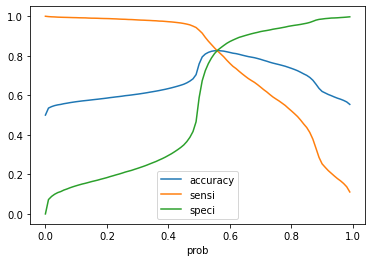

In [745]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [750]:
y_train_pred_final['final_predicted'] = y_train_pred_final.term_deposit_subscribed_Prob.map( lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.819330,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0.002408,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.739086,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0.499387,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.544840,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Making predictions on the test set

In [751]:
tn, fp, fn, tp = confusion_matrix(y_train_pred_final.term_deposit_subscribed, y_train_pred_final.final_predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.8253723027048931

In [752]:
speci = tn/(tn+fp)
speci 

0.8110120555161584

In [753]:
sensi = tp/(tp+fn)
sensi

0.8397325498936278

In [754]:
# X_test_sm = sm.add_constant(X_test)

In [755]:
# y_test_pred = res.predict(X_test_sm)

In [756]:
X_test_poly2 = poly_features_2.fit_transform(X_test)

In [757]:
sklearn_preds = clf.predict(X_test_poly2)
clf.predict_proba(X_test_poly2)
y_test_pred = pd.DataFrame(clf.predict_proba(X_test_poly2), columns=clf.classes_).drop(0, axis = 1)
y_test_pred

,1
0,0.490399
1,0.049235
2,0.516574
3,0.726351
4,0.557061
...,...
9103,0.566660
9104,0.483640
9105,0.000755
9106,0.292803


In [758]:
# Converting y_pred to a dataframe which is an array
# y_pred_1 = pd.DataFrame(y_test_pred)

In [759]:
# Let's see the head
# y_pred_1.head()

In [760]:
# Converting y_test to dataframe
# y_test_df = pd.DataFrame(y_test)

In [761]:
# Putting CustID to index
# y_test_df['ID'] = y_test_df.index

In [762]:
# Removing index for both dataframes to append them side by side 
# y_pred_1.reset_index(drop=True, inplace=True)
# y_test_df.reset_index(drop=True, inplace=True)

In [763]:
# Appending y_test_df and y_pred_1
# y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [764]:
y_test.reset_index(drop = True,inplace = True)

In [765]:
y_test_pred['term_deposit_subscribed'] = y_test
y_test_pred

,1,term_deposit_subscribed
0,0.490399,0
1,0.049235,0
2,0.516574,0
3,0.726351,1
4,0.557061,0
...,...,...
9103,0.566660,0
9104,0.483640,0
9105,0.000755,0
9106,0.292803,0


In [766]:
# Renaming the column 
y_test_pred = y_test_pred.rename(columns={ 1 : 'term_deposit_subscribed_Prob'})

In [767]:
# Rearranging the columns
y_test_pred = y_test_pred.reindex(['term_deposit_subscribed','term_deposit_subscribed_Prob'], axis=1)

In [768]:
# Let's see the head of y_pred_final
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob
0,0,0.490399
1,0,0.049235
2,0,0.516574
3,1,0.726351
4,0,0.557061


In [769]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_test_pred[i]= y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0,0.490399,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.049235,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.516574,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.726351,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.557061,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [770]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df2 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred[i]).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    speci = tn/(tn+fp)
    sensi = tp/(tp+fn)
    
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df2)

      prob  accuracy     sensi     speci
0.00  0.00  0.104633  1.000000  0.000000
0.01  0.01  0.149100  0.984260  0.051502
0.02  0.02  0.159091  0.983211  0.062784
0.03  0.03  0.165459  0.982162  0.070018
0.04  0.04  0.171278  0.979014  0.076885
...    ...       ...       ...       ...
0.95  0.95  0.864515  0.339979  0.925812
0.96  0.96  0.864625  0.325289  0.927652
0.97  0.97  0.866381  0.317943  0.930472
0.98  0.98  0.868028  0.305352  0.933783
0.99  0.99  0.869346  0.280168  0.938197

[100 rows x 4 columns]


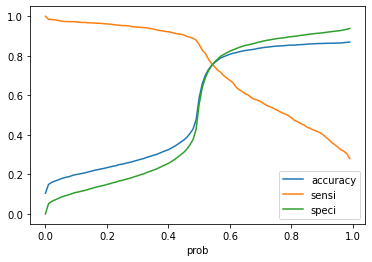

In [771]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df2.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [772]:
y_test_pred['predicted'] = y_test_pred.term_deposit_subscribed_Prob.map(lambda x: 1 if x > 0.55 else 0)

# Let's see the head
y_test_pred.head()

,term_deposit_subscribed,term_deposit_subscribed_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,predicted
0,0,0.490399,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.049235,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.516574,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.726351,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0.557061,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [773]:
tn, fp, fn, tp = confusion_matrix(y_test_pred.term_deposit_subscribed, y_test_pred.predicted).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy 

0.765590689503733

In [774]:
speci = tn/(tn+fp)
speci 

0.7679950950337217

In [775]:
sensi = tp/(tp+fn)
sensi

0.74501573976915

# Statsmodels with degree 2 

In [81]:
import statsmodels.api as sm

In [82]:
y_train = train.term_deposit_subscribed
X_train = train.drop('term_deposit_subscribed',1)

In [83]:
test2 = test.dropna()
y_test = test2.term_deposit_subscribed
X_test = test2.drop('term_deposit_subscribed',1)

In [84]:
test2.shape

(9108, 40)

In [85]:
from imblearn.over_sampling import SMOTE 
smote_ = SMOTE(random_state=42)
X_res, y_res = smote_.fit_resample(X_train, y_train)

In [86]:
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly_features_2.fit_transform(X_res)

NameError: name 'PolynomialFeatures' is not defined

In [ ]:
X_train_poly2.shape

In [785]:
X_train_sm = sm.add_constant(X_train_poly2)

In [788]:
# logm2 = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
# res = logm2.fit_regularized(method = 'elastic_net',maxiter = 1000) # It takes too much of time to compute
# res = logm2.fit()

In [ ]:
Logistic regression with polynomial degree 2 is the final mode as of now. 